# Project 3

In [1]:
include("track_plotting.jl")

    .*(Images.AbstractImageDirect, AbstractArray) at /home/tim/.julia/v0.4/Images/src/algorithms.jl:51
is ambiguous with: 
    .*(AbstractArray, Union{DataArrays.DataArray, DataArrays.PooledDataArray}, AbstractArray...) at /home/tim/.julia/v0.4/DataArrays/src/broadcast.jl:290.
To fix, define 
    .*(Images.AbstractImageDirect, Union{DataArrays.DataArray, DataArrays.PooledDataArray})
before the new definition.
    .*(AbstractArray, Images.AbstractImageDirect) at /home/tim/.julia/v0.4/Images/src/algorithms.jl:52
is ambiguous with: 
    .*(Union{DataArrays.DataArray, DataArrays.PooledDataArray}, AbstractArray...) at /home/tim/.julia/v0.4/DataArrays/src/broadcast.jl:290.
To fix, define 
    .*(Union{DataArrays.DataArray, DataArrays.PooledDataArray}, Images.AbstractImageDirect)
before the new definition.
    .==(Images.AbstractImageDirect{Bool, N<:Any}, AbstractArray{Bool, N<:Any}) at /home/tim/.julia/v0.4/Images/src/algorithms.jl:181
is ambiguous with: 
    .==(AbstractArray{Bool, N<:Any},

transform_regarding_TCA! (generic function with 1 method)

In [2]:
initial = readtable("initial.txt", separator=' ', names=[:id, :A, :L, :chi, :beta, :C1, :C2, :v1, :v2, :dv1, :dv2, :dh1, :dh2, :dpsi1, :dpsi2, :hmd, :vmd]);
initial[1,:]

,id,A,L,chi,beta,C1,C2,v1,v2,dv1,dv2,dh1,dh2,dpsi1,dpsi2,hmd,vmd
1,1,4,2,1,266.645,2,2,280.548,156.281,0.0,-1.45723,-549.312,0,0.729665,2.85143,2.73739,636.367


In [3]:
transition = readtable("transition.txt", separator=' ', names=[:id, :t, :dh1, :dh2, :dpsi1, :dpsi2]);
transition[1,:]

,id,t,dh1,dh2,dpsi1,dpsi2
1,1,0,-549.312,0,0.729665,2.85143


In [5]:
a1, a2 = pull_action_trace(transition, 1);

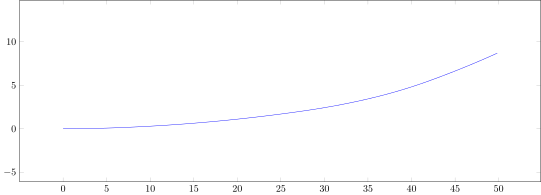

In [6]:
trace = get_state_trace(start_state(1.0,0.0), a1, 1.0)
Axis(PGFPlots.Plots.Linear(map(s->s.x,trace), map(s->s.y,trace), mark="none"), axisEqual=true, width="20cm", height="8cm")

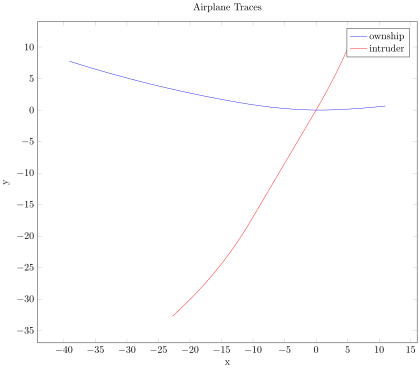

In [19]:
trace1 = get_state_trace(start_state(1.0,0.0), a1, 1.0)
trace2 = get_state_trace(start_state(1.0,0.0), a2, 1.0)
tca_geometry = TCAGeometry(1, 60.0, 0.0, 0.0, 4)
index_of_tca = 41
transform_regarding_TCA!(trace1, trace2, tca_geometry, index_of_tca)

Axis([PGFPlots.Plots.Linear(map(s->s.x,trace1), map(s->s.y,trace1), style="solid, blue, mark=none", legendentry="ownship"),
    PGFPlots.Plots.Linear(map(s->s.x,trace2), map(s->s.y,trace2), style="solid, red, mark=none", legendentry="intruder")],
axisEqual=true, width="15cm", xlabel="x", ylabel="y", title="Airplane Traces")

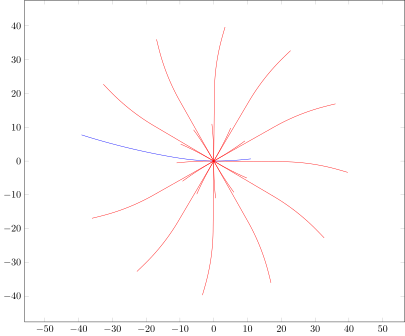

In [13]:
χ = 2
β = 40.0
hmd = 0.0

plots = PGFPlots.Plots.Plot[]
for β in 0:30:330
    
    tca_geometry = TCAGeometry(χ, β, hmd, 0.0, 4)
    
    t1 = deepcopy(trace1)
    t2 = deepcopy(trace2)
    
    transform_regarding_TCA!(t1, t2, tca_geometry, index_of_tca)

    if isempty(plots)
        push!(plots, PGFPlots.Plots.Linear(map(s->s.x,t1), map(s->s.y,t1), style="solid, blue, mark=none"))
    end
    push!(plots, PGFPlots.Plots.Linear(map(s->s.x,t2), map(s->s.y,t2), style="solid, red, mark=none"))
end
Axis(plots, axisEqual=true, width="15cm")

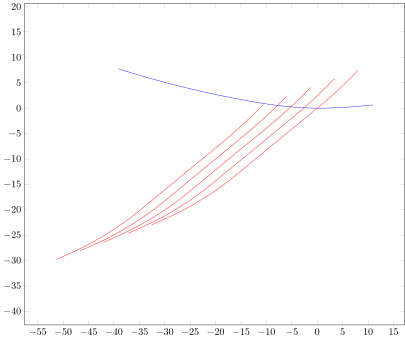

In [16]:
χ = 2
β = 40.0
hmd = 0.0

plots = PGFPlots.Plots.Plot[]
for hmd in linspace(0.0,20.0,5)
    
    tca_geometry = TCAGeometry(χ, β, hmd, 0.0, 4)
    
    t1 = deepcopy(trace1)
    t2 = deepcopy(trace2)
    
    transform_regarding_TCA!(t1, t2, tca_geometry, index_of_tca)

    if isempty(plots)
        push!(plots, PGFPlots.Plots.Linear(map(s->s.x,t1), map(s->s.y,t1), style="solid, blue, mark=none"))
    end
    push!(plots, PGFPlots.Plots.Linear(map(s->s.x,t2), map(s->s.y,t2), style="solid, red, mark=none"))
end
Axis(plots, axisEqual=true, width="15cm")